# Unsupervised Learning

In this notebook we will learn the basics of unsupervised learning. 

After completing this notebook you will be familiar with the basics of K-Means clustering as well as Principal Component Analysis for dimensionality reduction.

- PCA looks to find a low-dimensional representation of the observations that explain a good fraction of the variance
- Clustering looks to find homogeneous subgroups among the observations

In concrete terms we will analyse a data set consisting of a bag of [stop words](https://en.wikipedia.org/wiki/Stop_words) from a collection of books. Our task is to try to group and identify the authors of the books.

**Link to the data set source:** https://www.openml.org/d/458

**Structure of the Notebook:**
1. Exploring the data
 - Prepare the data for clustering
1. K-Means clustering
 - Determine amount of clusters using the elbow method
 - Apply K-Means clustering to identify authors
 - Analyse the results
1. Principal Component Analysis
 - Determine the amount of principal components
 - Analysing the principal components
 - Apply PCA to be used in clustering
 - Analyse the results
1. Using PCA to visualize clusters in two dimensions

## Loading the libraries

In [1]:
import numpy as np # library used for matrix and mathematical operations
import pandas as pd # library used for data wrangling
import matplotlib.pyplot as plt # library used for plotting data
import seaborn as sns # a more sophisticated library for visualizations

# display visualizations within the notebook
%matplotlib inline 

# a few personal preferences for the visualizations
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12})
sns.set_style('whitegrid')

## Loading the data

Use the `read_csv()` function from the Pandas library to load the dataset into a Pandas DataFrame. We'll call the variable `df` (short for dataframe).

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv

https://pandas.pydata.org/pandas-docs/stable/api.html#dataframe

In [2]:
df = pd.read_csv('analcatdata_authorship.csv')

## Exploring the data
**Basic information about the dataset**

Call the `info()` method on the newly created Pandas DataFrame.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html#pandas.DataFrame.info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 71 columns):
a         841 non-null int64
all       841 non-null int64
also      841 non-null int64
an        841 non-null int64
and       841 non-null int64
any       841 non-null int64
are       841 non-null int64
as        841 non-null int64
at        841 non-null int64
be        841 non-null int64
been      841 non-null int64
but       841 non-null int64
by        841 non-null int64
can       841 non-null int64
do        841 non-null int64
down      841 non-null int64
even      841 non-null int64
every     841 non-null int64
for       841 non-null int64
from      841 non-null int64
had       841 non-null int64
has       841 non-null int64
have      841 non-null int64
her       841 non-null int64
his       841 non-null int64
if        841 non-null int64
in        841 non-null int64
into      841 non-null int64
is        841 non-null int64
it        841 non-null int64
its       841 non-null in

**Getting a glimpse of the data**

Call the `head()` method from the Pandas DataFrame to view the content of the first 5 rows of the DataFrame.

**Tips:** You can return *n amount of rows by passing *n as a parameter value. You can list the last *n rows by calling the `tail()` method.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

In [4]:
df.head()

,a,all,also,an,and,any,are,as,at,be,...,what,when,which,who,will,with,would,your,BookID,Author
0,46,12,0,3,66,9,4,16,13,13,...,7,5,6,8,4,9,1,0,1,Austen
1,35,10,0,7,44,4,3,18,16,9,...,5,7,7,3,5,14,8,0,1,Austen
2,46,2,0,3,40,1,13,11,9,23,...,10,4,6,4,5,15,3,9,1,Austen
3,40,7,0,4,64,3,3,20,13,20,...,3,6,10,5,3,22,4,3,1,Austen
4,29,5,0,6,52,5,14,17,6,16,...,8,4,13,2,4,21,10,0,1,Austen


**Books**

Print the number of unique books by calling the `nunique()` function on the `BookID` column in the dataset.

https://pandas.pydata.org/pandas-docs/stable/indexing.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html#pandas.Series.nunique

In [5]:
df['BookID'].nunique()

12

**Authors**

Print the number of authors by calling the `unique()` function on the `Author` column in the dataset.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.unique.html#pandas.unique

In [6]:
df['Author'].unique()

array(['Austen', 'London', 'Milton', 'Shakespeare'], dtype=object)

**Books per author**

Group the data by `Author` using the `groupby()` functiond. 

Print the number of books per author by calling the `nunique()` function on the the `BookID` column.

In [7]:
df.groupby('Author')['BookID'].nunique()

Author
Austen          5
London          6
Milton          2
Shakespeare    12
Name: BookID, dtype: int64

**Words**

Print lists of top 10 words by:
- Value count in an individual row
- Sum or words occurring in total
- Mean word occurence per row

You can use `iloc` for slicing the dataframe (exclude last two columns) and `max()`, `sum()`, `mean()` functions in addition to a few familiar functions mentioned above to reach the desired result.

In [8]:
df.iloc[:,:-2].max().sort_values(ascending=False).head(10)

the     183
and     139
of      104
her      88
to       83
an       78
was      66
a        63
my       62
will     61
dtype: int64

In [9]:
df.iloc[:,:-2].sum().sort_values(ascending=False).head(10)

the     65060
and     47995
of      39045
to      37607
a       25764
in      21923
was     19024
that    16660
it      16615
her     13544
dtype: int64

In [10]:
df.iloc[:,:-2].mean().sort_values(ascending=False).head(10)

the     77.360285
and     57.068966
of      46.426873
to      44.717004
a       30.634958
in      26.067776
was     22.620690
that    19.809750
it      19.756243
her     16.104637
dtype: float64

**CONCLUSION/WHAT DID WE LEARN?**

*Your answer here*

## Preparing the data
K-Means might work in unintended ways if the unit and scale of data varies a lot. As we saw during the data analysis phase the data amount is rather homogenous. Nevertheless in this section we will standardize/normalize the data.

**Extract features and standardize the data**

Scikit Learn provides a convenient `StandardScaler` class that you can import from the sklearn.preprocessing package. Create and instance of the class and call the `fit_transform()` method to standardize the data.  

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

Transform all data but the last column into a separate variable `X` using slicing.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,:-1])

# K-Means clustering
In K-means clustering, we seek to partition the observations into a pre-specified *K* number of distinct, non-overlapping clusters.

**Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

**Theory/examples:** https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

## Identifying number of clusters
We can use the elbow method to determine the amount of clusters for the data. In the elbow method you will create 1 to *n* amount of clusters (where n is the amount of features) and store the Within Cluster Sum of Squares (WCSS) of each run. By plotting the WCSS values for each cluster amount we hope to see where the data converges.

Import the `KMeans` class from the `sklearn.cluster` package and create a Python list called `wcss`.
Loop through a range from 1 to num_features+1 and within this loop:
- Apply KMeans with `i` number of clusters
- Append the value from the `inertia_` attribute to the wcss list.

Finally `plot()` the data using Matplotlib (and style the plot according to your liking)

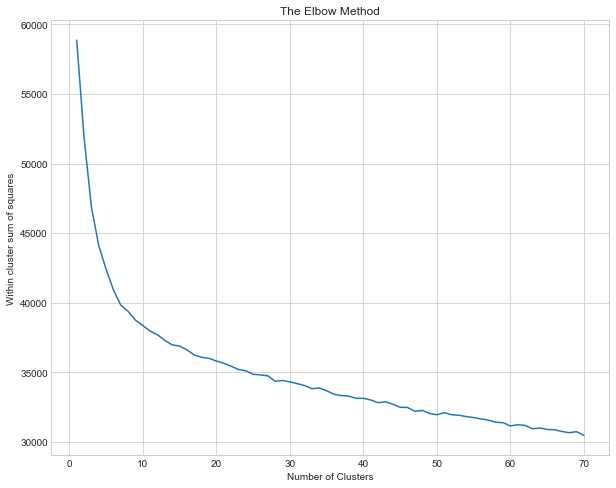

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,X.shape[1]+1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 8))
plt.plot(range(1,X.shape[1]+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

**CONCLUSION/WHAT DID WE LEARN?**

*Your answer here*

## Applying the  the actual K-Means clustering
With this specific dataset we're mostly interested in clustering by author, which means that the number of clusters is 4.

A few notes about the parameters of the `KMeas class`:
- init is used to define centroid/cluster inintialization
- n_init set the number of times the algorithm is run with different centroid seeds
- max_iter sets the maximum number of iterations for a single run
- random_state can be used if one needs reproducible results **NOTE:** Never use in production!

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

**Tip:** You can both `fit()` and `predict()` the data at once calling the `fit_predict()` method.

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20)
clusters = kmeans.fit_predict(X)

## Evaluating the results
Now that we have divided the data into four distinct clusters it is time to evaluate the results. In general, evaluating the performance of clustering algorithms is challenging to say the least. In this dataset we have a target variable, which means that we can compare the output of our clustering algorithm to that. **Note:** In normal cases, where clustering is used, we do not have this novelty. Otherwise supervised learning is generally more accurate than unsupervised learning. 

### Prepare the target/label to be used in metrics
Before we can evalue the results the label/target variable needs to be converted to a numeric representation since strings (such as Shakespeare) cannot be numerically computed.

Scikit Learn provides a convenient `LabelEncoder` class from the `sklearn.preprocessing` package to do this. Create an instance of the class and call the `fit_transform()` method to convert the labels into variable `y`.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df['Author'])

### Homogeneity, completeness and V-measure
Given the knowledge of the ground truth class assignments of the samples, it is possible to define some intuitive metric using conditional entropy analysis.

In particular Rosenberg and Hirschberg (2007) define the following two desirable objectives for any cluster assignment:

- **homogeneity:** each cluster contains only members of a single class.
- **completeness:** all members of a given class are assigned to the same cluster.

We can turn those concept as scores homogeneity_score and completeness_score. Both are bounded below by 0.0 and above by 1.0 (higher is better).

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [15]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y, clusters)

0.9285403837564781

In [16]:
from sklearn.metrics import completeness_score
completeness_score(y, clusters)

0.9234476943178092

The harmonic mean from homogenity and completeness is called **V-measure** and is computed using the `v_measure_score()` method.

In [17]:
from sklearn.metrics import v_measure_score
v_measure_score(y, clusters)

0.9259870369710866

**CONCLUSION/WHAT DID WE LEARN?**

*Your answer here*

# Principal Component Analysis

PCA looks to find a low-dimensional representation of the observations that explain a good fraction of the variance.

**Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

**Theory/examples:** https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

## Chosing number of Principal components
In order to identify how much variance is explained by each Principal Component we will create an instance of th `PCA` class from the `sklearn.decomposition` package. Lastly `fit()` the data to the newly created object.

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Plot the variance plots**

We can plot the variance in two different ways. 
1. Plotting the `eplained_variance_ratio_` visualizes the percentage of variance each Principal Component explains. This allows us to locate a similar elbow curve as we did with the K-Means algorithm.
1. Plotting the cumulative sum of the `eplained_variance_ratio_` visualizes the total amount of variance explained by a certain number of Principal Components combined. This might be useful if you are looking to reach a certain threshold level for the components. 

Create two separate plots visualizing both use cases. You can use th Numpy method `cumsum()` to calculate the cumulative sum of the components. 

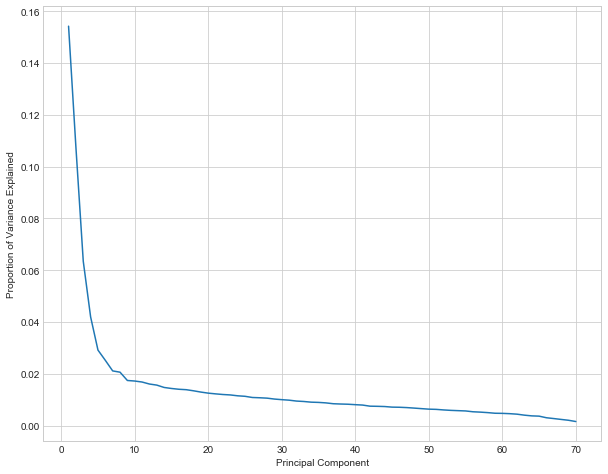

In [19]:
plt.figure(figsize=(10,8))
plt.plot(range(1, X.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

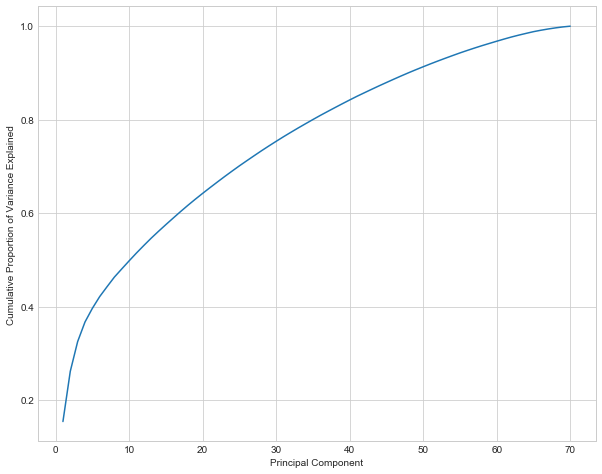

In [20]:
plt.figure(figsize=(10,8))
plt.plot(range(1, X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

**CONCLUSION/WHAT DID WE LEARN?**

*Your answer here*

## Analysing the Principal Components
Before we proceed with applying PCA in practice, let's have a look at how we can better understand the Principal Components.

In order to more easily analyze the components we'll create a new Pandas DataFrame of the data:
- Store the feature names in a variable named `columns` (remember to exclude the Author column)
- Create a list of principal component identifiers i.e. \['PC1', 'PC2', ... 'PCn'] (you can use Python [list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) for this
- Store the principal components in a variable named `data` by accessing the `components_` attribute from the pca object
- Create a new Pandas DataFrame using above variables (set the parameters `data`, `columns`, `index`). Call it `df_pca` so you do not overwrite the main DataFrame.

In [21]:
columns = df.columns[:-1]
index = ['PC'+str(i) for i in range(1, len(pca.components_)+1)]
data = pca.components_
df_pca = pd.DataFrame(data=data, columns=columns, index=index)

Take a peek at the data using `head()` to ensure that the DataFrame looks okay.

In [22]:
df_pca.head()

,a,all,also,an,and,any,are,as,at,be,...,were,what,when,which,who,will,with,would,your,BookID
PC1,0.061621,0.033038,0.112313,0.074013,0.157702,-0.118782,-0.168612,-0.098770,0.058488,-0.215517,...,0.138464,-0.141367,0.084198,-0.070381,0.020805,-0.180523,0.027024,-0.120414,-0.161111,-0.102753
PC2,0.096928,-0.022930,0.007028,-0.000578,-0.032808,0.219512,-0.091550,0.135566,0.199824,0.151928,...,0.135342,-0.117702,0.013355,0.107956,-0.011418,-0.088003,-0.080531,0.186753,-0.126589,-0.011433
PC3,-0.254546,0.144083,0.067153,-0.232479,0.192748,-0.016324,-0.096424,0.098247,-0.041480,0.024084,...,-0.003743,0.033069,-0.017601,0.196880,0.199505,-0.029434,0.224265,-0.031884,-0.113830,-0.123034
PC4,0.030397,0.113232,-0.136185,0.303879,-0.182933,0.024688,-0.167341,0.046243,0.101729,0.019973,...,-0.221297,0.112921,0.021893,0.015102,-0.053921,-0.112869,0.150191,-0.026465,-0.066024,0.103496
PC5,-0.056328,0.253284,0.097162,0.127927,-0.040873,0.058204,0.136393,0.001675,-0.021955,0.029077,...,-0.021199,0.047602,0.014760,-0.074890,0.143743,0.080579,-0.044816,-0.096019,-0.014736,-0.304526


**Plotting the Principal Components**

A heatmap provides a good overview of the effect that each variable has on each principal component. We will utilize the `heatmap()` method from the Seaborn library to create the heatmap. For convenience we'll enlargen the plot by first calling the `figure()` method from the Matplotlib library and provide the figure dimensions as a tuple for the `figsize` parameter. E.g. use a size of *(25, 10)*.

In addition, it might be a good idea to only plot the top 10 principal components to improve the readability of the plot.

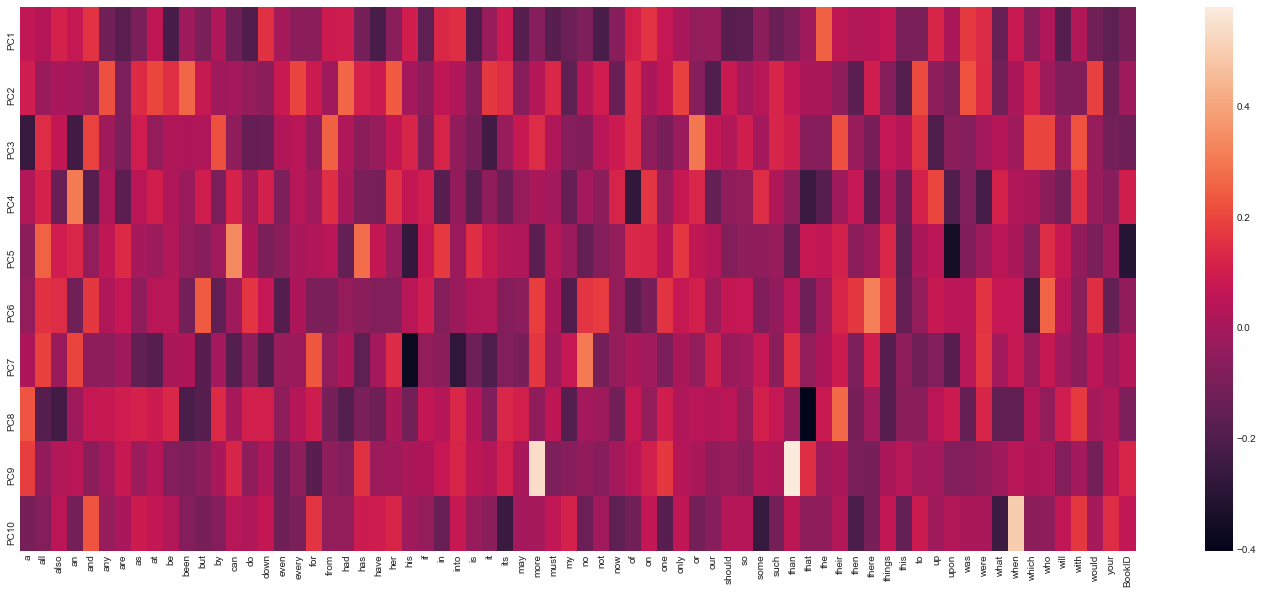

In [23]:
plt.figure(figsize=(25,10))
sns.heatmap(df_pca.iloc[:10,:])

### Principal Component 1
The visualization might give an good overview but to more specifically understand the variables effect on the Principal Components we need to have a closer look at the data. 

Let's have a look at the variables that have the biggest positive and negative impact on the Principal component value.

Slice the data using `loc` to only select the first principal component and use the `sort_values()` and `head()` functions to create the top lists.

In [24]:
df_pca.loc['PC1',:].sort_values(ascending=False).head()

the     0.252042
was     0.176094
on      0.159533
and     0.157702
down    0.156362
Name: PC1, dtype: float64

In [25]:
df_pca.loc['PC1',:].sort_values().head()

be     -0.215517
not    -0.211689
have   -0.210792
is     -0.202049
do     -0.197850
Name: PC1, dtype: float64

You can use the Pandas `describe()` method to get a statistical overview of the data.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html

In [26]:
df_pca.loc['PC1',:].describe()

count    70.000000
mean     -0.026286
std       0.117439
min      -0.215517
25%      -0.120006
50%      -0.036099
75%       0.070831
max       0.252042
Name: PC1, dtype: float64

**CONCLUSION/WHAT DID WE LEARN?**

*Your answer here*

## Repeat K-Means with Principal Components
Now that we better understand PCA we can apply it to the clustering algorithm. 
Select two different amount of principal components:
1. Number of components that explains at least 80% of the variance
1. Number of components that explains at least 90% of the variance


- Create the PCA object and apply the transformation (now you need to use `fit_transform()` to actually get the values for the principal components.
- Create the K-Means object and predict the clusters.
- Apply the three metrics used earlier and compare the results.

### PCA using number of components from the elbow

In [27]:
pca = PCA(n_components=7)
pca_results = pca.fit_transform(X)

In [28]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(pca_results)

In [29]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y, clusters)

0.9239858510673448

In [30]:
from sklearn.metrics import completeness_score
completeness_score(y, clusters)

0.9188396810348067

In [31]:
from sklearn.metrics import v_measure_score
v_measure_score(y, clusters)

0.9214055805998372

### PCA using ~80% variance explained

In [32]:
pca = PCA(n_components=35)
pca_results = pca.fit_transform(X)

In [33]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(pca_results)

In [34]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y, clusters)

0.9301311719690378

In [35]:
from sklearn.metrics import completeness_score
completeness_score(y, clusters)

0.9245418466740246

In [36]:
from sklearn.metrics import v_measure_score
v_measure_score(y, clusters)

0.9273280872015836

**CONCLUSION/WHAT DID WE LEARN?**

*Your answer here*

## Using PCA to Visualize Clusters

In [37]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(pca_results)

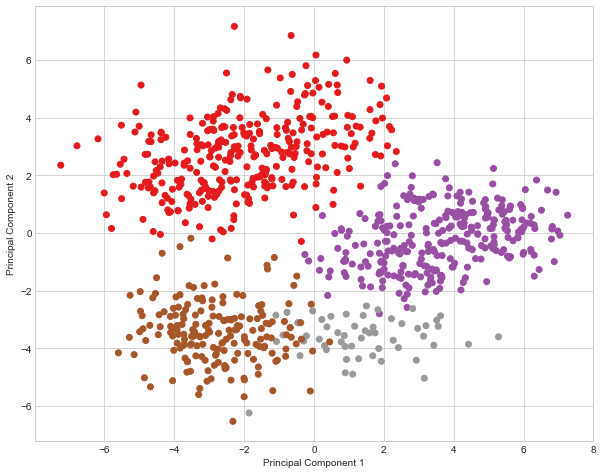

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(pca_results[:,0], pca_results[:,1], c=clusters, cmap='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

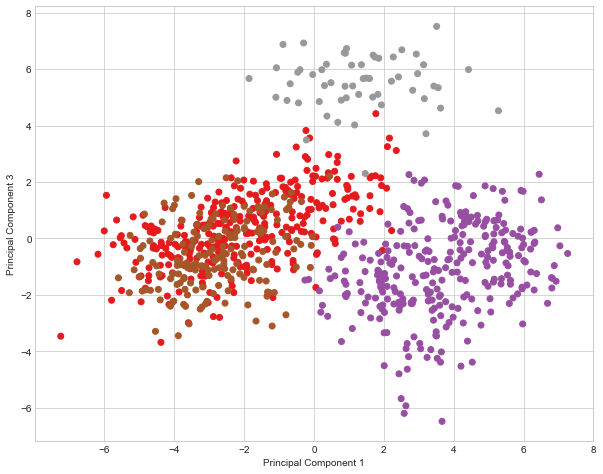

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(pca_results[:,0], pca_results[:,2], c=clusters, cmap='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.show()

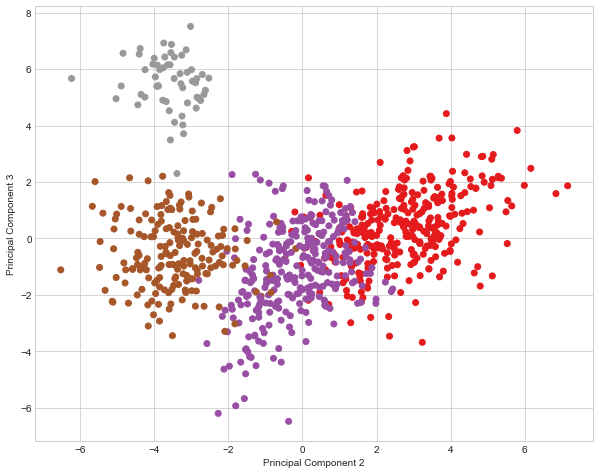

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(pca_results[:,1], pca_results[:,2], c=clusters, cmap='Set1')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.show()

**Comparison to actual labels**

Finally we'll end the visualization by comparing the identified clusters and actual labels side by side. 

Text(0,0.5,'Principal Component 2')

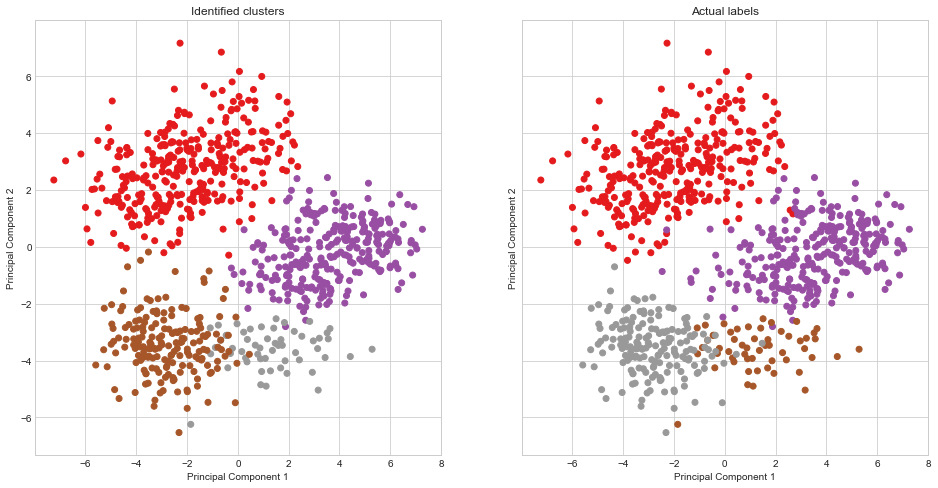

In [41]:
fig, ax = plt.subplots(1,2, figsize=(16,8), sharey=True)
ax[0].scatter(pca_results[:,0], pca_results[:,1], c=clusters, cmap='Set1')
ax[0].set_title('Identified clusters')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[1].scatter(pca_results[:,0], pca_results[:,1], c=y, cmap='Set1')
ax[1].set_title('Actual labels')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

**CONCLUSION/WHAT DID WE LEARN?**

*Your answer here*